In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
import lib
import plotting
import markov_chain as mc
import markov_tools as mt

In [4]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [5]:
from configparser import ConfigParser
cfg = ConfigParser()
cfg.read("config.cfg")

['config.cfg']

In [6]:
from tqdm._tqdm_notebook import tqdm_notebook as tqdm # we manually import the notebook submodule as the normal one struggles with jupyterlab
tqdm.pandas() # this enables us to use progress_apply instead of apply

In [7]:
results_prefix = cfg.get("results", "prefix")

sequence_file = os.path.join(cfg.get("directory", "exchange"), results_prefix + "001_clustering.p")
labels_file = os.path.join(cfg.get("directory", "exchange"), "[wikidata]004_labels_readable.p")

In [8]:
df = pd.read_pickle(sequence_file)
df.head()

,bot_name,bot_sequence,length,length_nobreak,sequence,sequence_readable,user_id,user_name,stat_dist,kmeans_4,kmeans_8
0,False,False,1517,1385,"[REVERT_MANUAL, BREAK, CLAIM_CREATE, BREAK, CL...","[Revert Item, Break, Create Claim, Break, Crea...",1,Hoo man,"[0.033592832488441825, 0.029154644609674315, 0...",0,3
1,False,False,44,23,"[SITELINK_ADD, BREAK, SITELINK_ADD, BREAK, SIT...","[Add Sitelink, Break, Add Sitelink, Break, Add...",100012,Kane 14,"[0.02586206896551723, 0.025862068965517227, 0....",2,1
2,False,False,17,12,"[LABEL_UPDATE, ALIAS_ADD, BREAK, CLAIM_CREATE,...","[Edit Label, Add Item Alias, Break, Create Cla...",1000197,Zaizone,"[0.026205469193709592, 0.07779210211701826, 0....",1,5
3,False,False,91,82,"[SITELINK_UPDATE, BREAK, LABEL_ADD, CLAIM_CREA...","[Edit Sitelink, Break, Add Label, Create Claim...",1001159,Gogo hr,"[0.04118566424353361, 0.03162035177772598, 0.0...",0,0
4,False,False,21,12,"[DESCRIPTION_ADD, BREAK, DESCRIPTION_UPDATE, D...","[Add Description, Break, Edit Description, Add...",1001194,Phylosofo,"[0.08620689655172406, 0.025862068965517255, 0....",1,7


In [9]:
labels = pd.read_pickle(labels_file)['label'].values

We test only one clustering (numer of clusters) at a time.  
For each label/action we conduct a pairwise tukey's test to highlight the actions that show significant difference.

Note: as this is a pairwise comparison for each single label this generates a lot of output!

In [10]:
len(df.iloc[0]['stat_dist'])

32

In [11]:
len(labels)

32

In [12]:
num_clusters = 4
df_selector = "kmeans_{n}".format(n=num_clusters)

### Tests on stat dist vectors

In [13]:
stat_dist_df = pd.DataFrame([x for x in df["stat_dist"].values], columns=labels)
stat_dist_df['cluster_id'] = df[df_selector].values
stat_dist_df

,Add Description,Add Item Alias,Add Label,Add Qualifier,Add Reference,Add Sitelink,Break,Create Claim,Create Item,Create Property,...,Remove Alias,Remove Claim,Remove Description,Remove Item,Remove Label,Remove Qualifier,Remove Reference,Remove Sitelink,Revert Item,cluster_id
0,0.033593,0.029155,0.034387,0.050540,0.025861,0.026999,0.040888,0.095465,0.026089,0.025861,...,0.026203,0.042354,0.026202,0.025861,0.026089,0.025861,0.025861,0.026316,0.038050,0
1,0.025862,0.025862,0.025862,0.025862,0.025862,0.114074,0.110064,0.025862,0.025862,0.025862,...,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,2
2,0.026205,0.077792,0.047230,0.026205,0.026205,0.034952,0.075386,0.036393,0.026205,0.026205,...,0.026205,0.026205,0.026205,0.026205,0.026205,0.026205,0.026205,0.026205,0.026205,1
3,0.041186,0.031620,0.039277,0.025870,0.025870,0.033523,0.043239,0.125247,0.031617,0.025870,...,0.025870,0.027654,0.025870,0.025870,0.025870,0.025870,0.025870,0.025870,0.025870,0
4,0.086207,0.025862,0.025862,0.025862,0.025862,0.025862,0.103448,0.025862,0.025862,0.025862,...,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,1
5,0.033873,0.029929,0.040651,0.025862,0.025862,0.056303,0.064067,0.051250,0.032394,0.025862,...,0.027094,0.028697,0.025985,0.025862,0.025985,0.025862,0.025862,0.029066,0.027464,1
6,0.025862,0.025862,0.025862,0.025862,0.025862,0.066092,0.094828,0.031609,0.025862,0.025862,...,0.043103,0.031609,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,2
7,0.025861,0.025861,0.025861,0.025861,0.025861,0.025861,0.086026,0.063312,0.025861,0.025861,...,0.025861,0.062549,0.025861,0.025861,0.025861,0.025861,0.025861,0.025861,0.025861,1
8,0.025862,0.025862,0.025862,0.025862,0.025862,0.092912,0.092912,0.025862,0.025862,0.025862,...,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.035441,0.025862,2
9,0.036079,0.026657,0.026657,0.026657,0.026657,0.026657,0.083193,0.096584,0.026657,0.026657,...,0.026657,0.026657,0.026657,0.026657,0.026657,0.026657,0.026657,0.026657,0.026657,0


In [14]:
sig_labels = []
for i, l in enumerate(labels):
    vals = stat_dist_df[l]
    lbls = stat_dist_df["cluster_id"]
    hsd = pairwise_tukeyhsd(vals, lbls, alpha=0.01)
    print("{l}: {s} / 6".format(l=l, s=sum(hsd.reject)))
    print(hsd.summary())
    
    if sum(hsd.reject) == 6:
        sig_labels.append(l)

Add Description: 5 / 6
Multiple Comparison of Means - Tukey HSD,FWER=0.01
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.0236   0.0227  0.0244  True 
  0      2    -0.0045  -0.0053 -0.0037  True 
  0      3    -0.0051  -0.0061 -0.0041  True 
  1      2    -0.0281  -0.0289 -0.0273  True 
  1      3    -0.0286  -0.0296 -0.0276  True 
  2      3    -0.0005  -0.0015  0.0005 False 
---------------------------------------------
Add Item Alias: 5 / 6
Multiple Comparison of Means - Tukey HSD,FWER=0.01
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.0036   0.0032  0.004   True 
  0      2    -0.0033  -0.0037 -0.0029  True 
  0      3    -0.0033  -0.0038 -0.0029  True 
  1      2    -0.0069  -0.0072 -0.0065  True 
  1      3    -0.0069  -0.0074 -0.0065  True 
  2      3      -0.0   -0.0005  0.0004 False 
---------------------------------------------
Add Label: 6 / 6
Multiple

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

/home/pkasper/python/Python-3.7.1/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


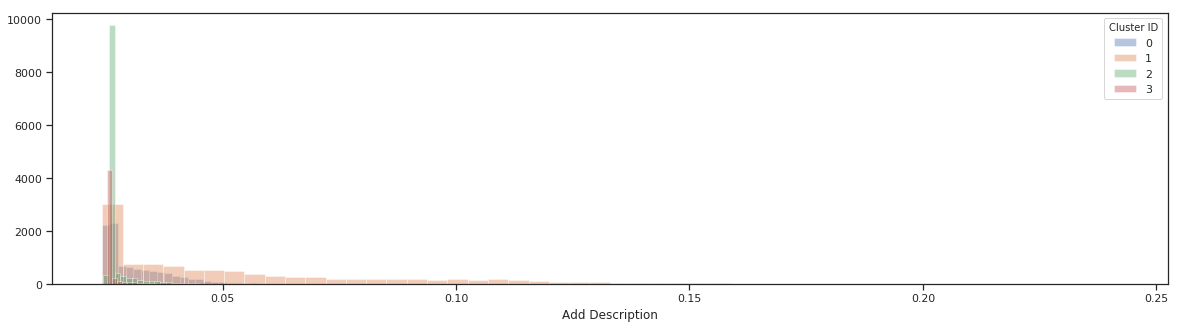

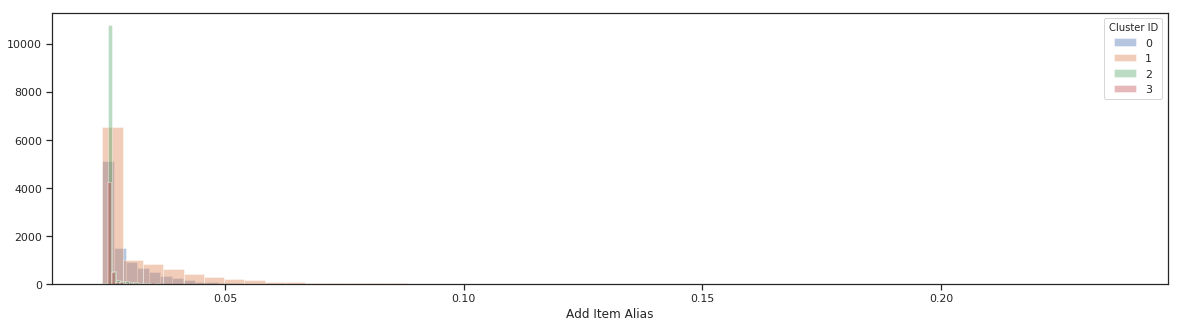

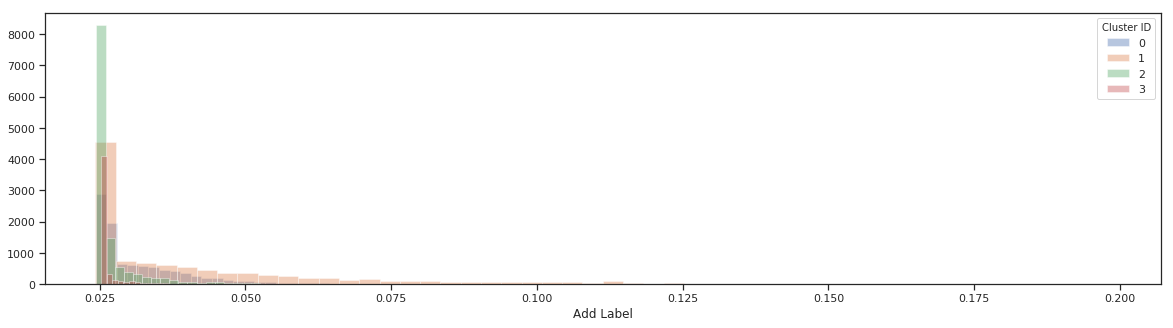

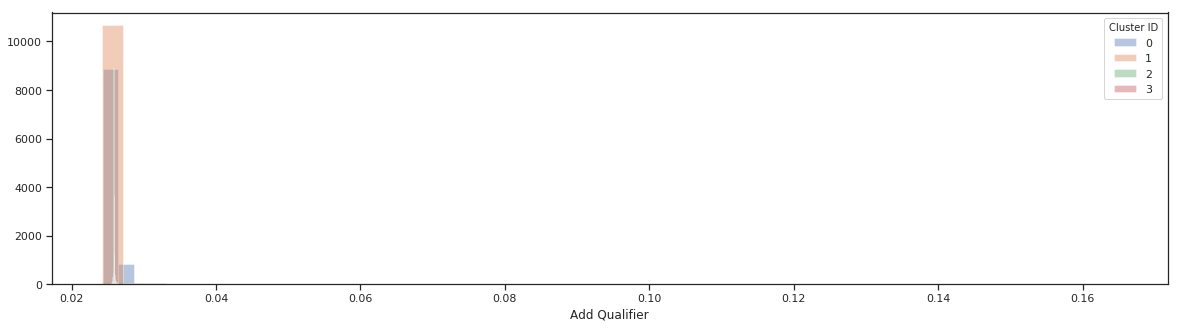

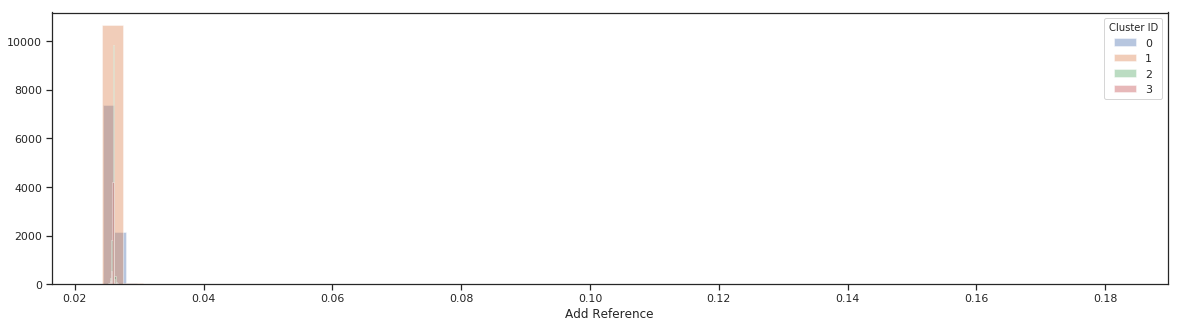

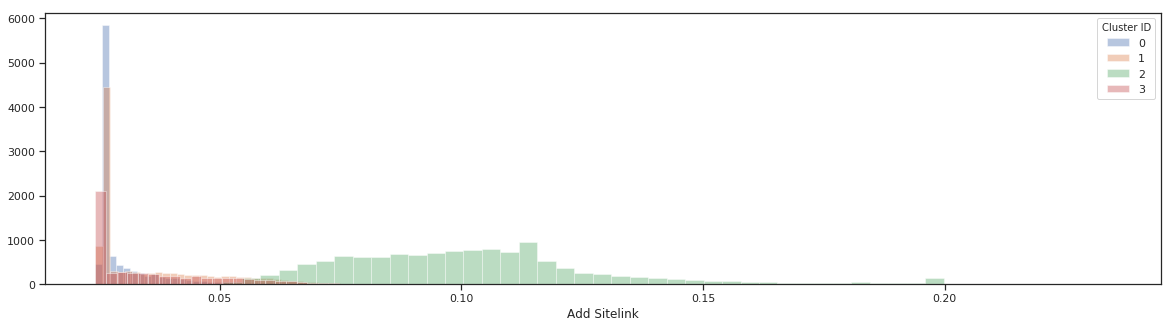

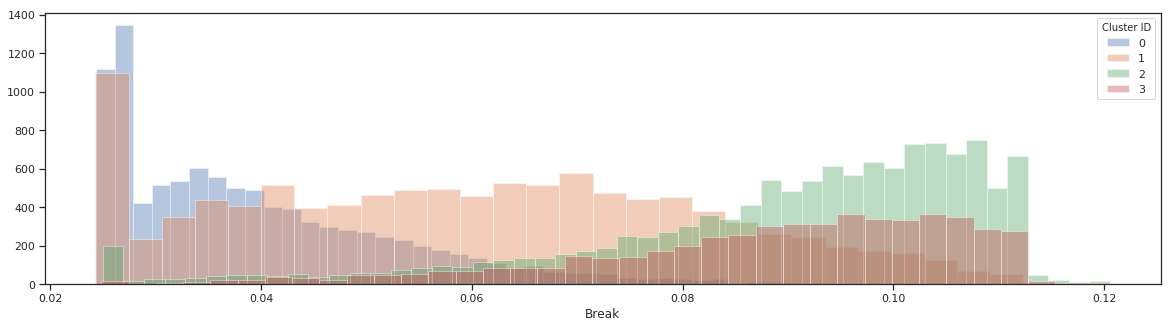

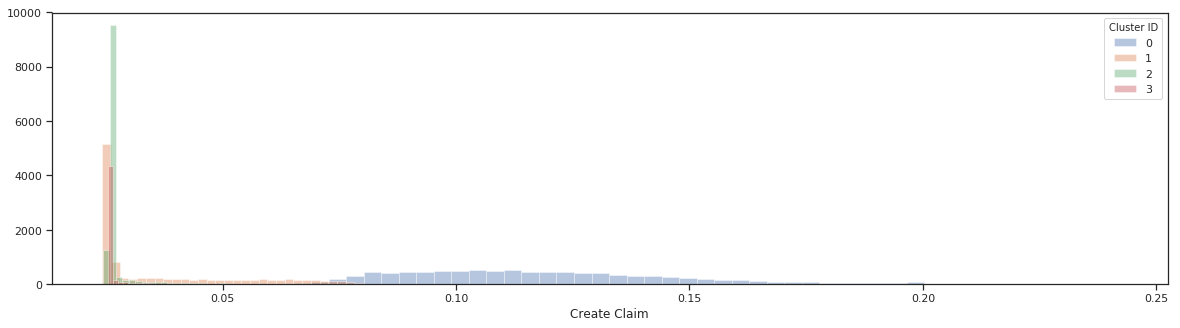

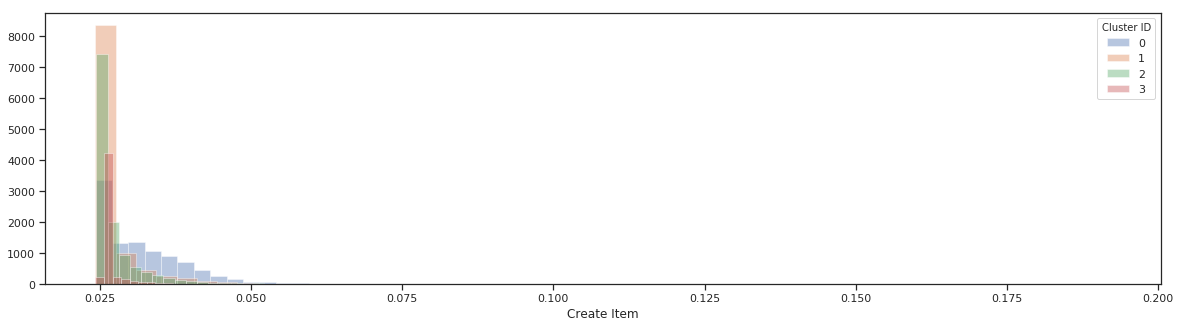

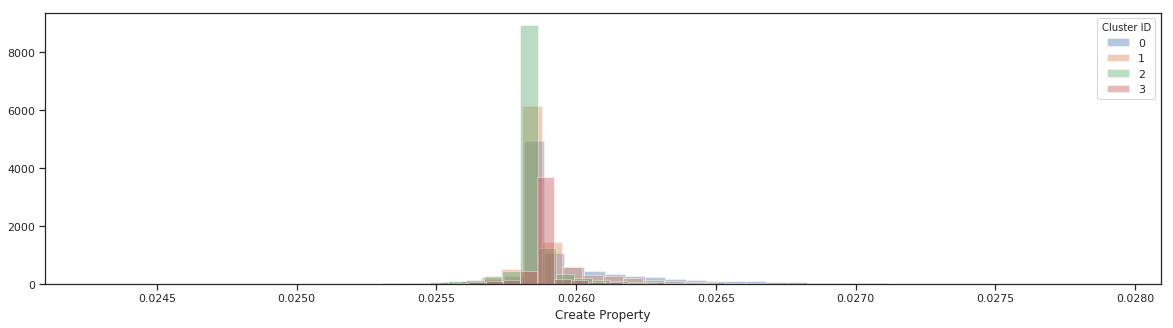

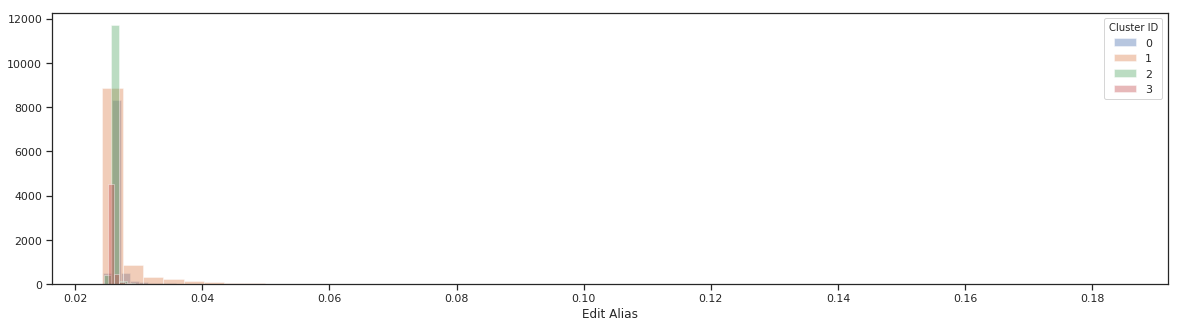

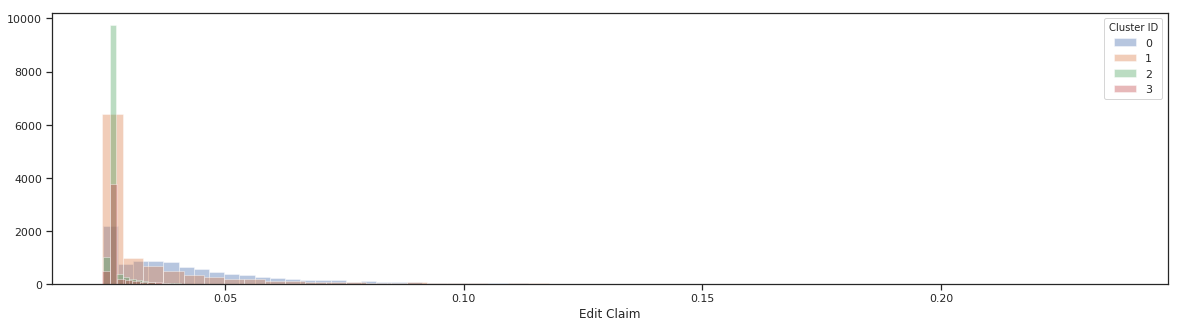

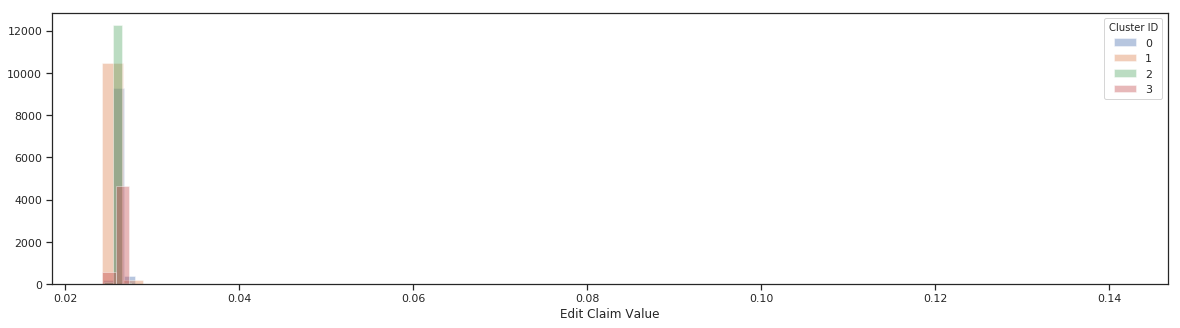

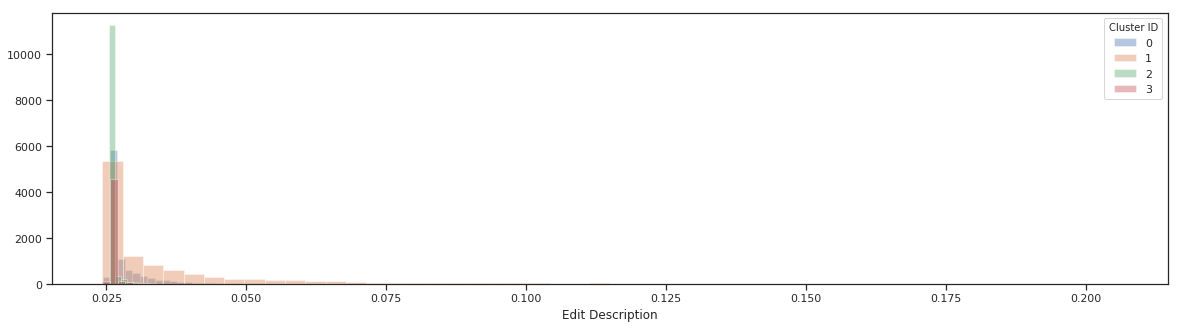

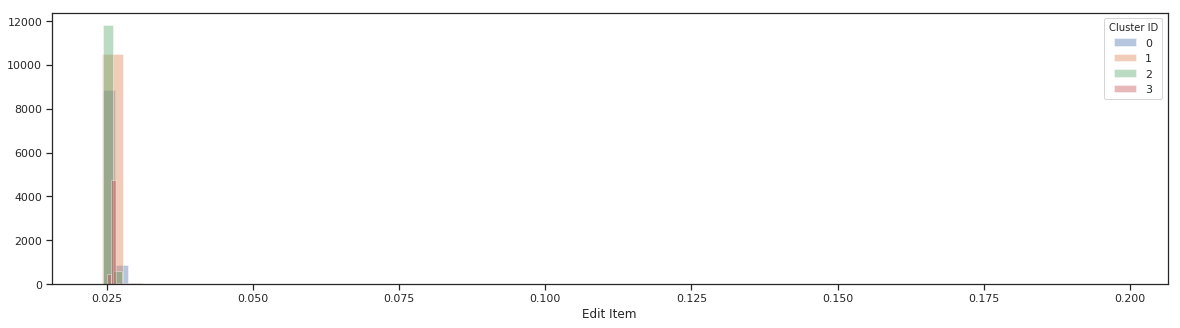

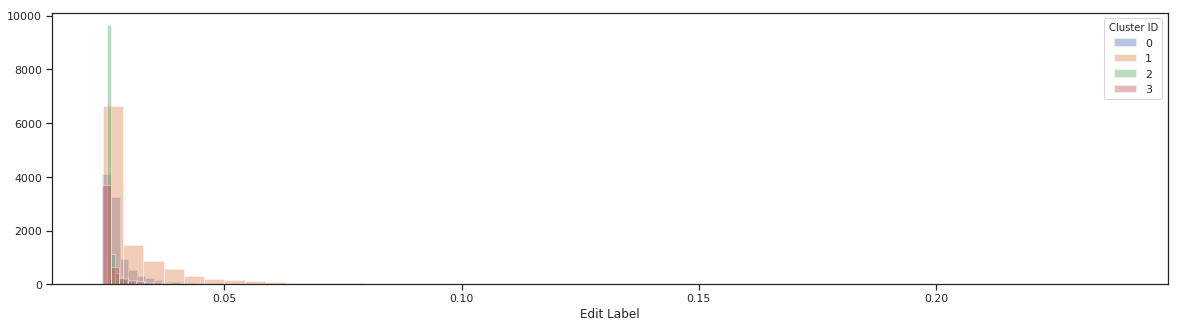

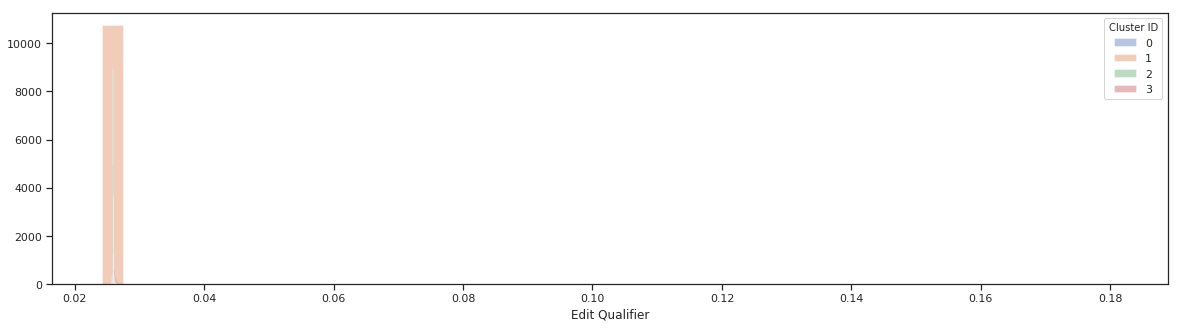

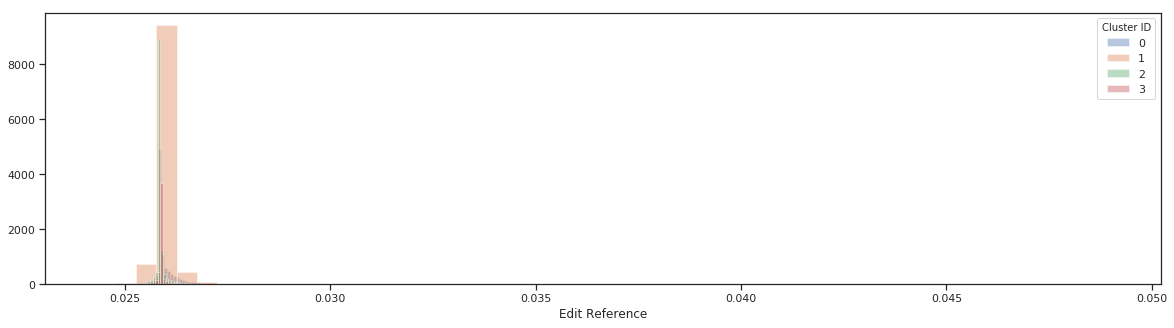

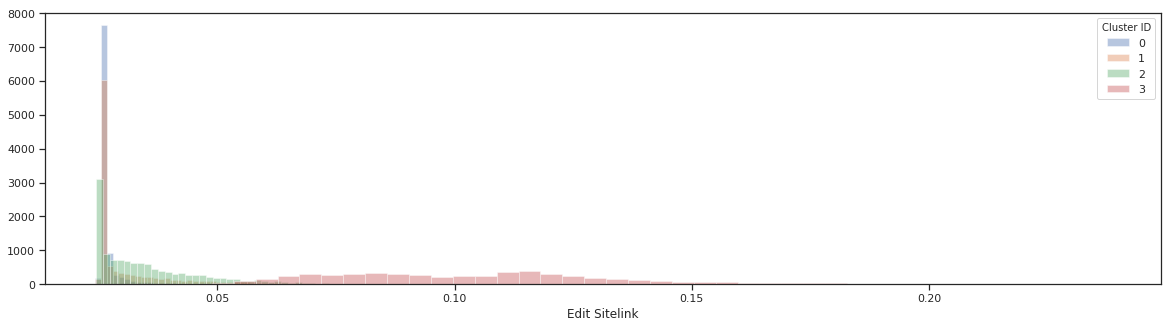

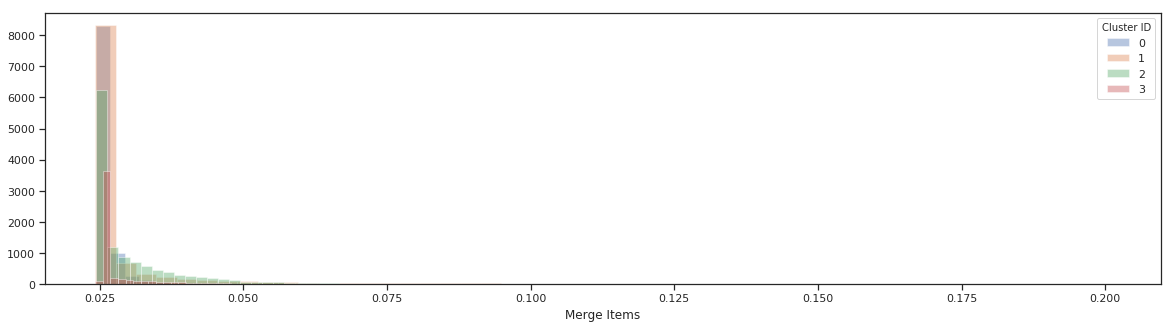

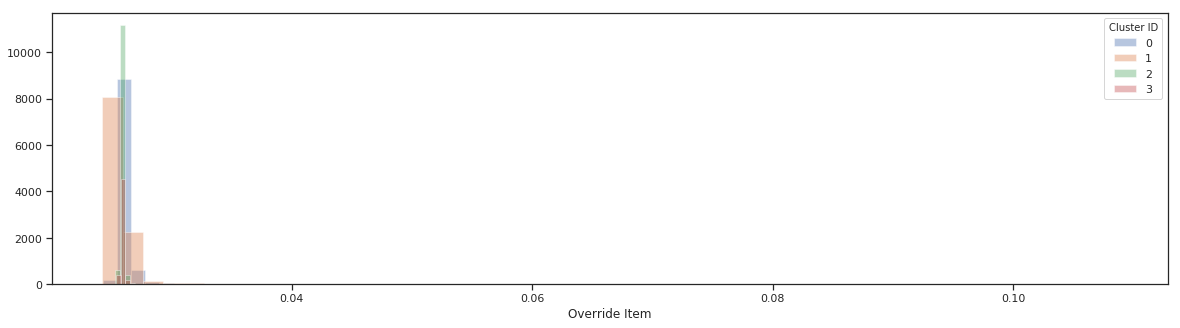

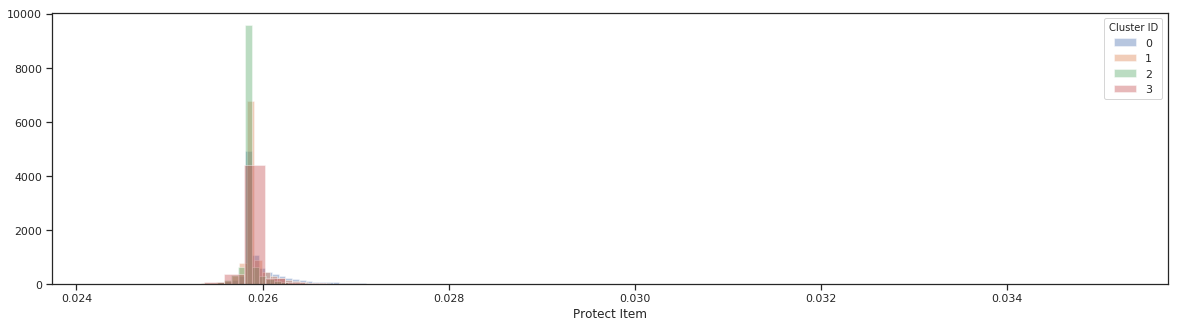

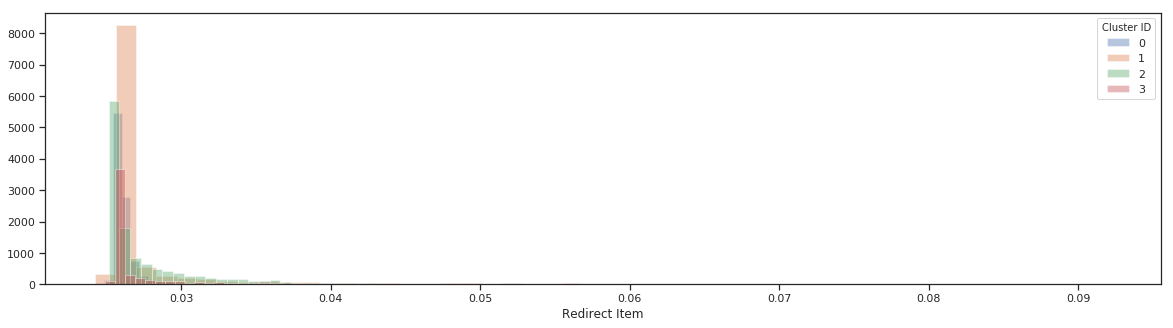

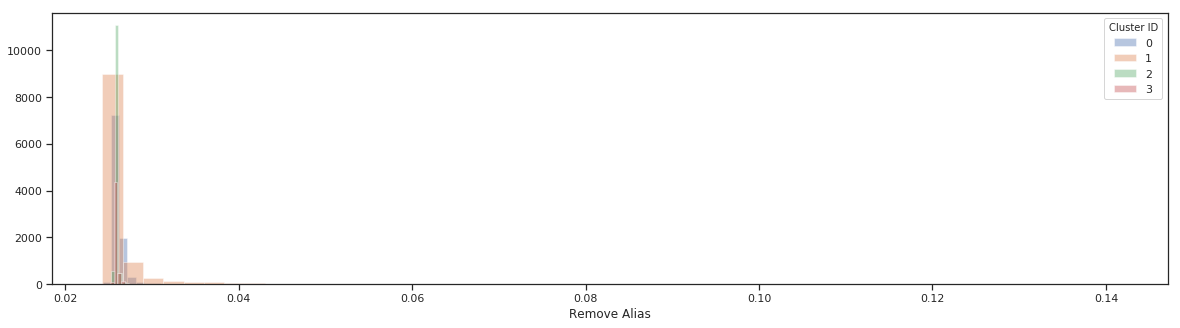

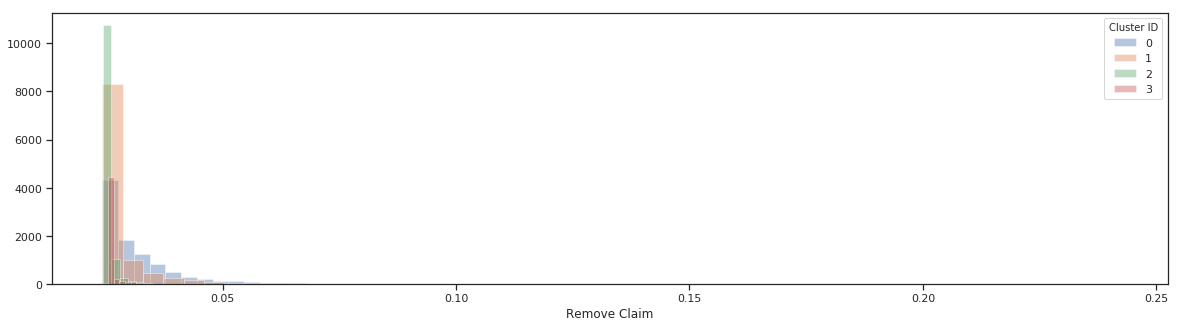

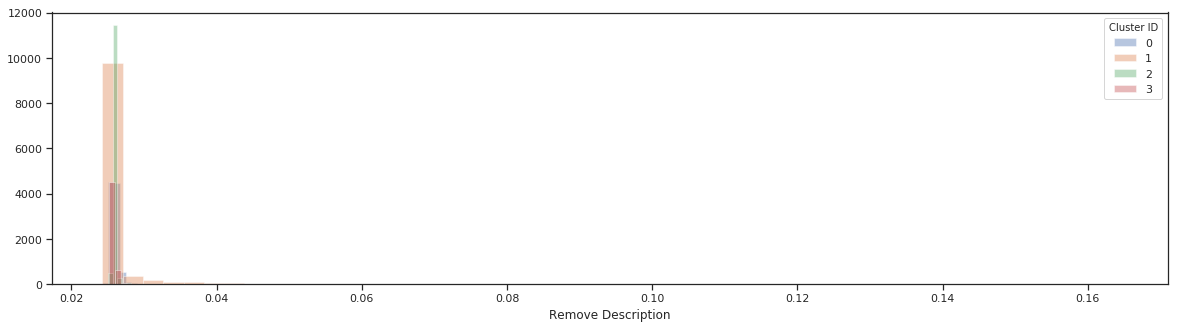

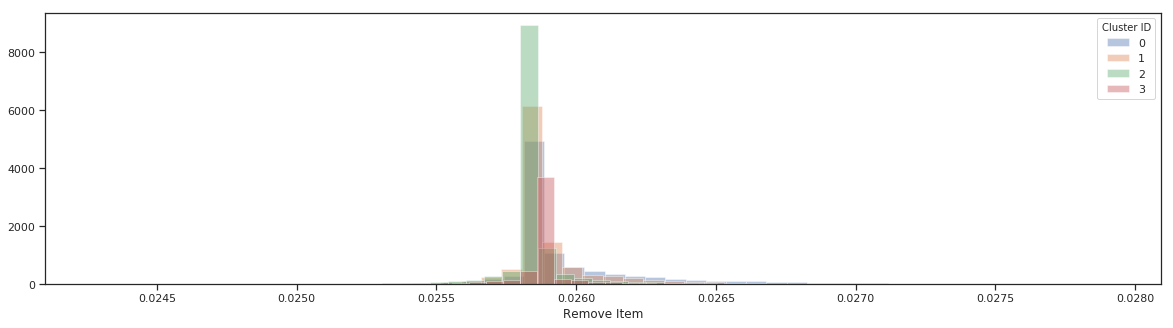

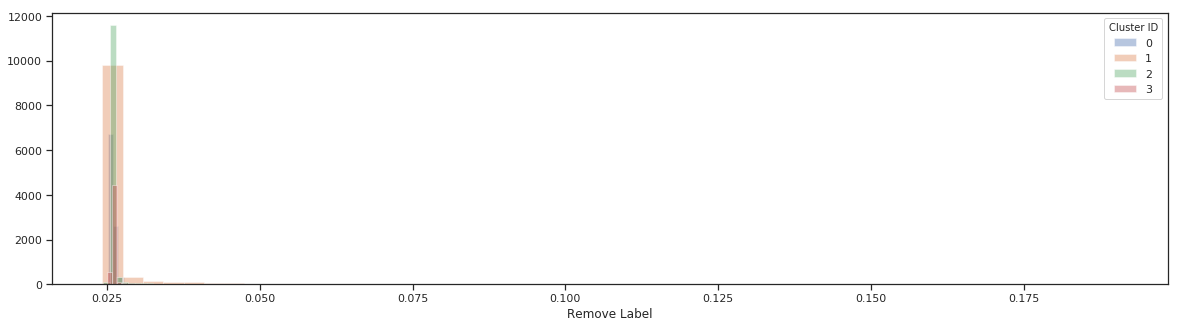

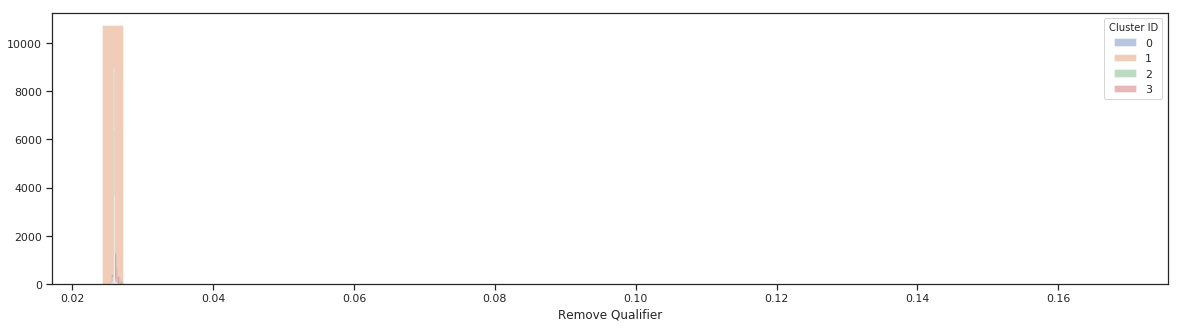

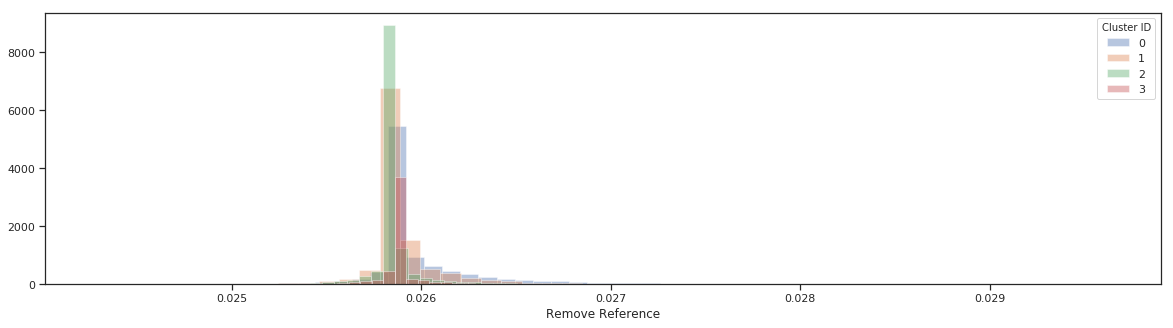

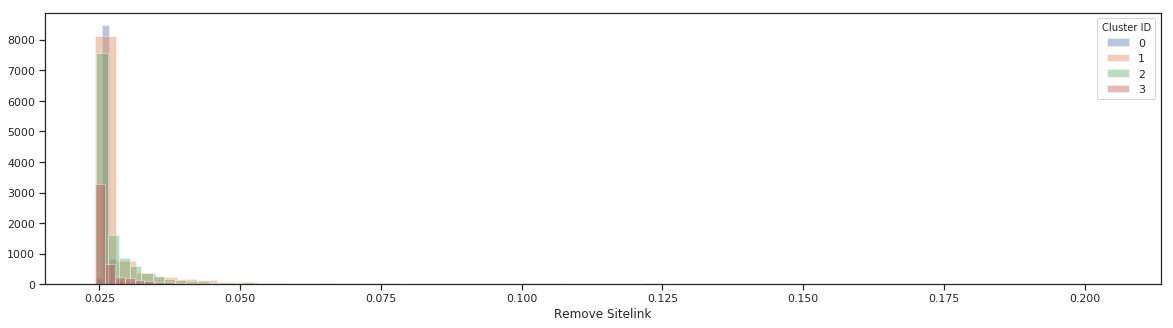

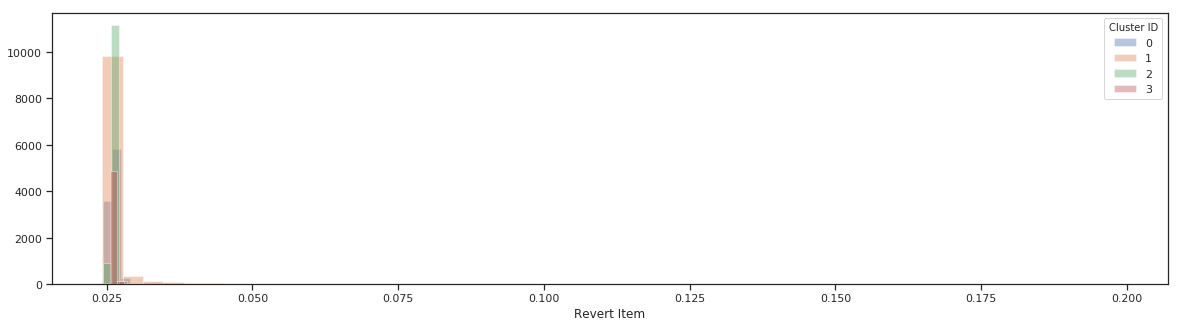

In [16]:
for i, l in enumerate(labels):    
    figure, axis = plt.subplots(figsize=(20,5))
    for c_id, c_members in stat_dist_df.groupby("cluster_id"):
        sns.distplot(c_members[l], hist=True, rug=False, kde=False, ax=axis, label=c_id)
    axis.legend(title="Cluster ID")